In [36]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt

## Reading the data file
credit_card = pd.read_excel('default of credit card clients.xls', skiprows = 1)
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
## Splitting the data into train and test
train = credit_card.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
test = credit_card[~np.isin(credit_card['ID'], train['ID'])]

## Dropping ID 
train = train.drop(columns = 'ID', axis = 1)
test = test.drop(columns = 'ID', axis = 1)

test_target = test['default payment next month']
test = test.drop(columns = 'default payment next month', axis = 1)

## Writing the data to csv 
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)
test_target.to_csv('test_target.csv', index = False)

## Answering Questions

[Text(697.5, 713.475, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 19200\nvalue = [14953, 4247]'),
 Text(348.75, 509.625, 'PAY_2 <= 1.5\ngini = 0.276\nsamples = 17197\nvalue = [14355, 2842]'),
 Text(174.375, 305.775, 'PAY_AMT3 <= 395.0\ngini = 0.244\nsamples = 15772\nvalue = [13529, 2243]'),
 Text(87.1875, 101.92499999999995, 'gini = 0.34\nsamples = 3743\nvalue = [2929, 814]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.209\nsamples = 12029\nvalue = [10600, 1429]'),
 Text(523.125, 305.775, 'PAY_6 <= 1.0\ngini = 0.487\nsamples = 1425\nvalue = [826, 599]'),
 Text(435.9375, 101.92499999999995, 'gini = 0.468\nsamples = 1013\nvalue = [634, 379]'),
 Text(610.3125, 101.92499999999995, 'gini = 0.498\nsamples = 412\nvalue = [192, 220]'),
 Text(1046.25, 509.625, 'PAY_6 <= 1.0\ngini = 0.419\nsamples = 2003\nvalue = [598, 1405]'),
 Text(871.875, 305.775, 'BILL_AMT1 <= 2207.5\ngini = 0.454\nsamples = 1202\nvalue = [419, 783]'),
 Text(784.6875, 101.92499999999995, 'gini = 0.498\nsamples = 106\nvalue = 

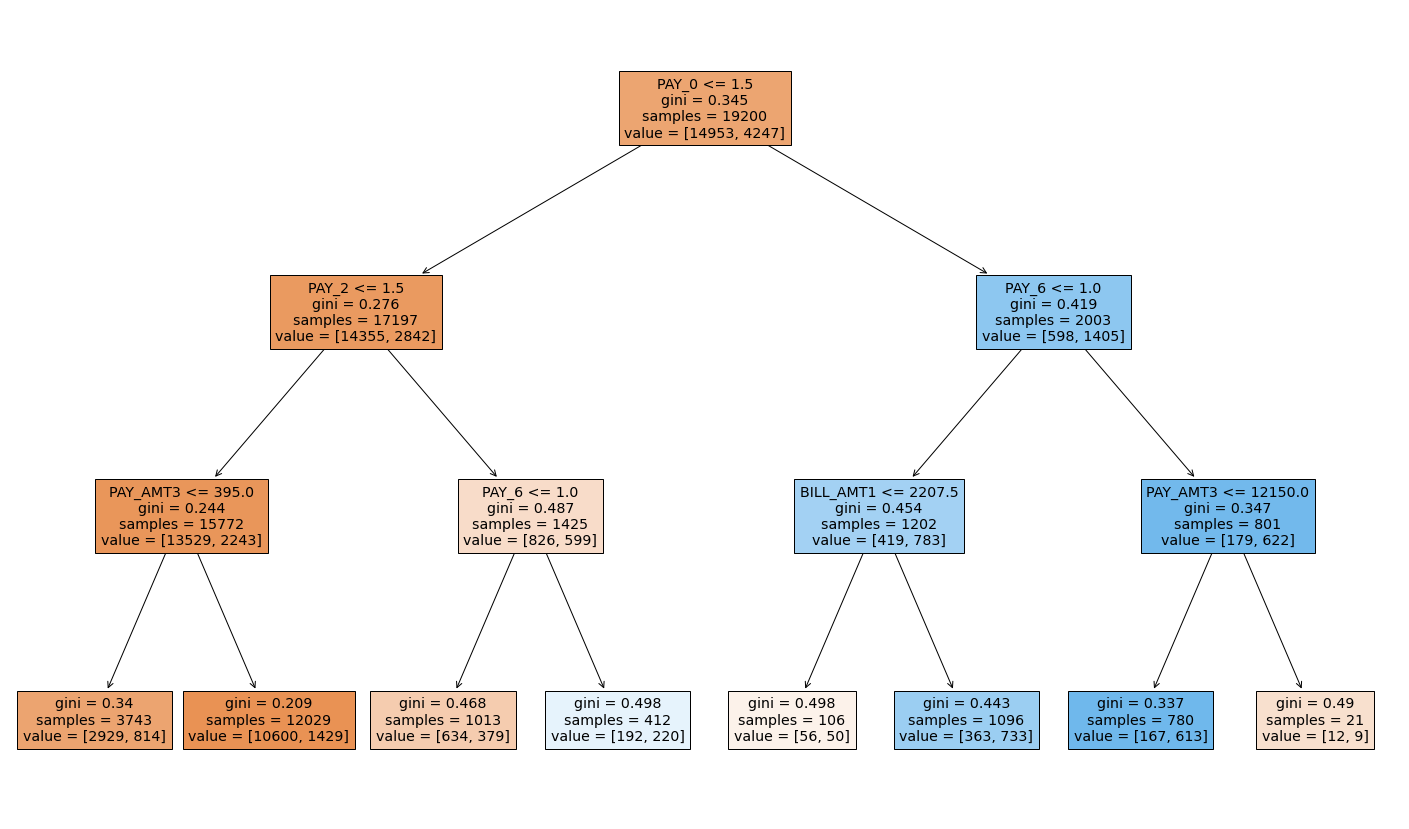

In [17]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Reading data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ## Chaning labels
train['SEX'] = np.where(train['SEX'] == 1, 'male', 'female')
train['EDUCATION'] = np.where(train['EDUCATION'] == 1, 'graduate_school', 
                              np.where(train['EDUCATION'] == 2, 'university',
                                       np.where(train['EDUCATION'] == 3, 'high_school', 'other_unknown')))
train['MARRIAGE'] = np.where(train['MARRIAGE'] == 1, 'married', 
                             np.where(train['MARRIAGE'] == 2, 'single', 'other'))


test['SEX'] = np.where(test['SEX'] == 1, 'male', 'female')
test['EDUCATION'] = np.where(test['EDUCATION'] == 1, 'graduate_school', 
                              np.where(test['EDUCATION'] == 2, 'university',
                                       np.where(test['EDUCATION'] == 3, 'high_school', 'other_unknown')))
test['MARRIAGE'] = np.where(test['MARRIAGE'] == 1, 'married', 
                             np.where(test['MARRIAGE'] == 2, 'single', 'other'))

## Creating ID columns
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data into train and test
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
testing = train[~np.isin(train['ID'], training['ID'])]

## Dropping ID
training = training.drop(columns = 'ID', axis = 1)
testing = testing.drop(columns = 'ID', axis = 1)

## Defining inputs and target variables
X_train = training.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y_train = training['default payment next month'].reset_index(drop = True)

X_test = testing.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y_test = testing['default payment next month'].reset_index(drop = True)

## Changing labels to dummies 
X_train = pd.concat([X_train.drop(columns = 'SEX', axis = 1), pd.get_dummies(X_train['SEX'])], axis = 1)
X_train = pd.concat([X_train.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X_train['EDUCATION'])], axis = 1)
X_train = pd.concat([X_train.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X_train['MARRIAGE'])], axis = 1)

X_test = pd.concat([X_test.drop(columns = 'SEX', axis = 1), pd.get_dummies(X_test['SEX'])], axis = 1)
X_test = pd.concat([X_test.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X_test['EDUCATION'])], axis = 1)
X_test = pd.concat([X_test.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X_test['MARRIAGE'])], axis = 1)

## Engineering features via decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

## Visualizing the decision-tree model 
fig = plt.figure(figsize = (25, 15))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

In [18]:
## Engineering features from decision tree
X_train['interaction_1'] = np.where((X_train['PAY_0'] <= 1.5) & (X_train['PAY_2'] <= 1.5) & (X_train['PAY_AMT3'] > 395), 1, 0)
X_train['interaction_2'] = np.where((X_train['PAY_0'] <= 1.5) & (X_train['PAY_2'] <= 1.5) & (X_train['PAY_AMT3'] < 395), 1, 0)

X_test['interaction_1'] = np.where((X_test['PAY_0'] <= 1.5) & (X_test['PAY_2'] <= 1.5) & (X_test['PAY_AMT3'] > 395), 1, 0)
X_test['interaction_2'] = np.where((X_test['PAY_0'] <= 1.5) & (X_test['PAY_2'] <= 1.5) & (X_test['PAY_AMT3'] < 395), 1, 0)

In [14]:
## Strong heredity
importance_results = list()

for i in range(0, 20):
    print(i)
    ## Building RF model
    RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train.drop(columns = ['interaction_1', 'interaction_2'], axis = 1), Y_train)
    
    ## Extracting and storting importance
    importance_results.append(RF.feature_importances_)
    
## Converting list to data-frame
importance_results = pd.DataFrame(importance_results)
importance_results.columns = X_train.drop(columns = ['interaction_1', 'interaction_2'], axis = 1).columns

## Sorting based on average importance
importance_results = importance_results.apply(np.mean, axis = 0).sort_values(ascending = False)
importance_results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


PAY_0              0.305279
PAY_2              0.205352
PAY_3              0.117101
PAY_4              0.095866
PAY_5              0.088667
PAY_6              0.057694
PAY_AMT1           0.029988
LIMIT_BAL          0.021788
PAY_AMT3           0.017642
PAY_AMT2           0.016095
PAY_AMT4           0.010827
PAY_AMT6           0.006918
PAY_AMT5           0.006523
BILL_AMT1          0.004767
BILL_AMT2          0.003790
BILL_AMT5          0.002614
BILL_AMT4          0.002612
BILL_AMT3          0.002354
BILL_AMT6          0.001797
AGE                0.000623
graduate_school    0.000354
male               0.000314
female             0.000284
married            0.000244
single             0.000226
other_unknown      0.000145
university         0.000084
high_school        0.000030
other              0.000020
dtype: float64

In [19]:
## Computing strong heredeity interactions
X_train['interaction_3'] = X_train['PAY_0'] * X_train['PAY_2'] 
X_train['interaction_4'] = X_train['PAY_0'] * X_train['PAY_3']
X_train['interaction_5'] = X_train['PAY_2'] * X_train['PAY_3']

X_test['interaction_3'] = X_test['PAY_0'] * X_test['PAY_2'] 
X_test['interaction_4'] = X_test['PAY_0'] * X_test['PAY_3']
X_test['interaction_5'] = X_test['PAY_2'] * X_test['PAY_3']

## RFE

In [ ]:
## Running RFE with logistic
RF_auto_features = RFECV(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3), step = 1, min_features_to_select = 2, cv = 3).fit(X_train, Y_train)
